In [1]:
# import packages and dateset
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import random
from matplotlib import pyplot as plt

In [2]:
def knn(inX, dataSet, labels, k):
    '''
    input: 
       inX: the data point for test
       dataSet: dataset with exsiting labels
       labels: tags corresponding to the data in dataSet
       k: the number of nearest neighbors
    
    return: the label of data point after classification
    '''
    
    # get the number of rows 
    row = dataSet.shape[0]
    
    # copy the data point to new dataset with the same rows number with dataSet
    # calculate the difference between these two set
    diffMatrix = np.tile(inX, (row, 1)) - dataSet
    
    # get the Euclidean distance
    innerDist = np.sum(diffMatrix ** 2, axis=1)
    distance = innerDist ** 0.5
    
    # sort the distances from the smallest distance to largest distanceand get the corresponding index
    sortedDist = distance.argsort()   

    # initialize a new dict to record the count of labels
    countDict = {}
    for i in range(k):
        iLable = labels[sortedDist[i]]
        countDict[iLable] = countDict.get(iLable, 0) + 1
    
    # sort the records according to the counts
    result = sorted(countDict.items(), key = lambda x: x[1], reverse=True)
    
    # return the fianl label for the data point
    return result[0][0]

In [3]:
# loading the iris dataset
iris = datasets.load_iris()

#shuffle the dataset randomly
data_size = iris.data.shape[0]
index = [i for i in range(data_size)] 
random.shuffle(index)  
iris.data = iris.data[index]
iris.target = iris.target[index]

# split the dataset into training set and testing set
test_size = 40
x_train = iris.data[test_size:]
x_test =  iris.data[:test_size]
y_train = iris.target[test_size:]
y_test = iris.target[:test_size]

In [4]:
# initialize a list to store the fianl labels of each data point in testing set
predictions = []
for i in range(x_test.shape[0]):
    # apply the knn function and k equals to 5
    predictions.append(knn(x_test[i], x_train, y_train, 5))

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.82      0.90        11
           2       0.85      1.00      0.92        11

   micro avg       0.95      0.95      0.95        40
   macro avg       0.95      0.94      0.94        40
weighted avg       0.96      0.95      0.95        40



In [5]:
# print the confusion matrix
print(confusion_matrix(y_test,predictions))

[[18  0  0]
 [ 0  9  2]
 [ 0  0 11]]


In [6]:
# create an empty list to store the accuracy for each choosen k
accuracy = []
# Choose the proper k between 1 and 20 for the classification
for k in range(1, 21):
    predictions = []
    for i in range(x_test.shape[0]):
        predictions.append(knn(x_test[i], x_train, y_train, k))
    predictions = np.array(predictions)
    
    # calculate the accuracy for the current k
    accuracy_k = np.round(np.average(predictions == y_test), 3)
    # append it into accuracy list
    accuracy.append(accuracy_k)

Text(0, 0.5, 'Accuracy')

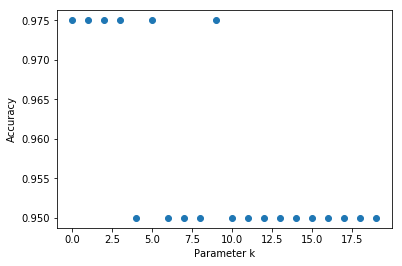

In [7]:
# plot the relationship between accuracy corresponding k
plt.plot(accuracy,'o')
plt.xlabel('Parameter k')
plt.ylabel('Accuracy')